In [81]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification, make_blobs
from sklearn.metrics import accuracy_score

In [82]:
X, y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0, random_state=42)

In [83]:
X.shape, y.shape

((500, 2), (500,))

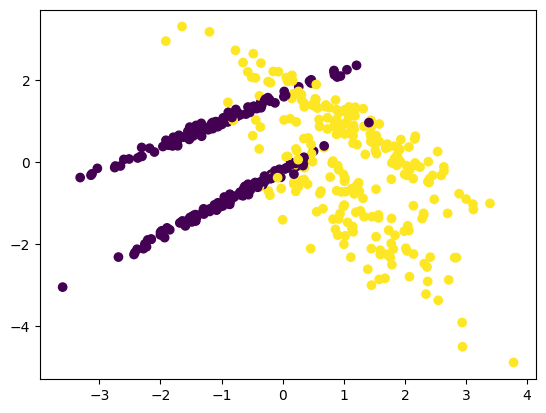

In [84]:
plt.scatter(X[:, 0], X[:, 1],c = y)
plt.show()

In [85]:
class LogisticRegression:
    def __init__(self,lr = 0.01):
        self.lr = lr
    def fit(self,X,y,epochs = 100):
        self.w, self.w0 = self.gradientDescent(X,y,self.lr,epochs)

    def hypothesis(self,x,w,w0):
        return self.sigmoid(w.dot(x.T) + w0)

    def sigmoid(self, z):
        return 1/(1 + np.exp(-z))

    def loss(self,x,w,w0,y):
        ypred = self.hypothesis(x,w,w0)
        # return np.mean((ypred-y)**2)
        return -np.sum(y*np.log2(ypred) + (1-y)*np.log2(1 - ypred))

    def predict(self,X):
        # return self.hypothesis(X,self.w,self.w0)
        ypred = self.hypothesis(X, self.w, self.w0)
        ypred[ypred<0.5] = 0
        ypred[ypred>=0.5] = 1
        return ypred
        # return np.where(ypred > 0.5, 1, 0)

    def gradientDescent(self,X,y,lr = 0.01,epochs = 100):
        w = np.zeros(shape=(X.shape[1],))
        w0 = 1
        self.loss_e = [self.loss(X,w,w0,y)]
        for e in range(epochs):
            ypred = self.hypothesis(X,w,w0)
            
            # i = np.random.randint(X.shape[0])
            # grads = (ypred[i]-y[i])*X[i]
            
            grads = (ypred-y)@X
            w = w - lr*grads
            w0 = w0 - lr*np.mean(ypred-y)

            self.loss_e.append(self.loss(X,w,w0,y))
            
        return w,w0

In [86]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [87]:
clf = LogisticRegression(lr = 0.01)
clf.fit(x_train, y_train, epochs=2000)

In [88]:
ypred = clf.predict(x_train)
print(accuracy_score(y_train,ypred))

0.88


In [89]:
ypred = clf.predict(x_test)
print(accuracy_score(y_test,ypred))

0.9


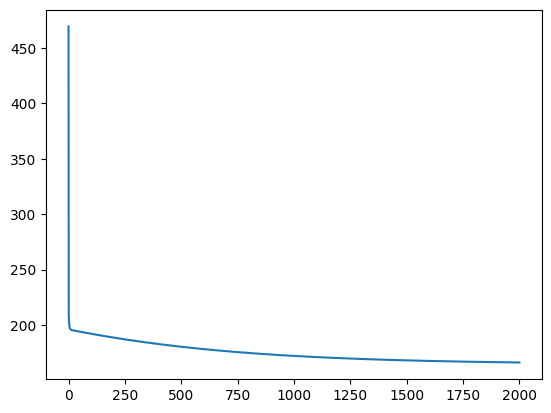

In [90]:
plt.plot(clf.loss_e)
plt.show()

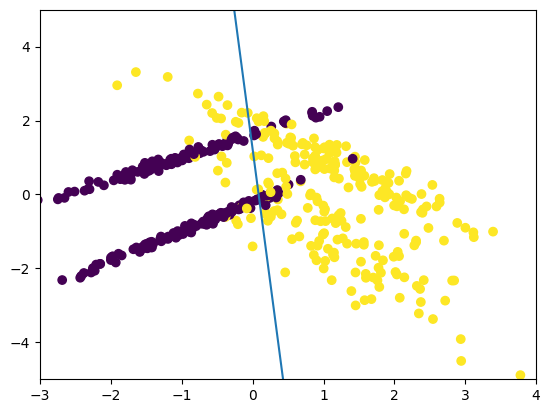

In [92]:
clf = LogisticRegression(lr = 0.01)
clf.fit(x_train,y_train,100000)
x1 = np.linspace(-3,4,1000)
x2 =-(clf.w[0]*x1 + clf.w0)/clf.w[1]
plt.plot(x1,x2)
plt.scatter(X[:,0],X[:,1],c = y)
plt.xlim(-3,4)
plt.ylim(-5,5)
plt.show()

ValueError: x and y must be the same size

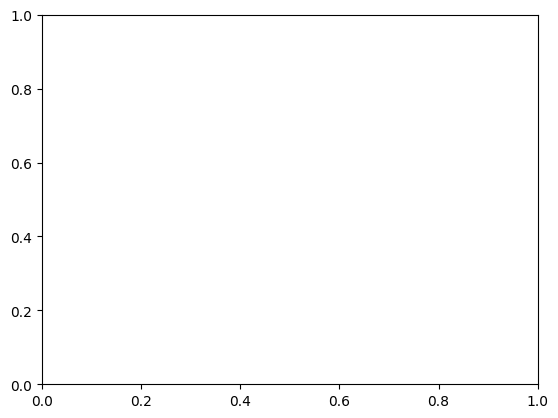